In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [17]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5003 - accuracy: 0.4549 - val_loss: 1.2250 - val_accuracy: 0.5644
Epoch 2/10
1563/1563 [==============================] - 66s 43ms/step - loss: 1.1584 - accuracy: 0.5925 - val_loss: 1.1442 - val_accuracy: 0.5961
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0131 - accuracy: 0.6417 - val_loss: 1.0113 - val_accuracy: 0.6434
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9198 - accuracy: 0.6754 - val_loss: 0.9548 - val_accuracy: 0.6671
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8463 - accuracy: 0.7015 - val_loss: 0.9049 - val_accuracy: 0.6836
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7852 - accuracy: 0.7247 - val_loss: 0.9454 - val_accuracy: 0.6668
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7414 - accuracy: 0.7409 - val_loss: 0.9481 -

313/313 - 3s - loss: 0.9692 - accuracy: 0.6861 - 3s/epoch - 11ms/step


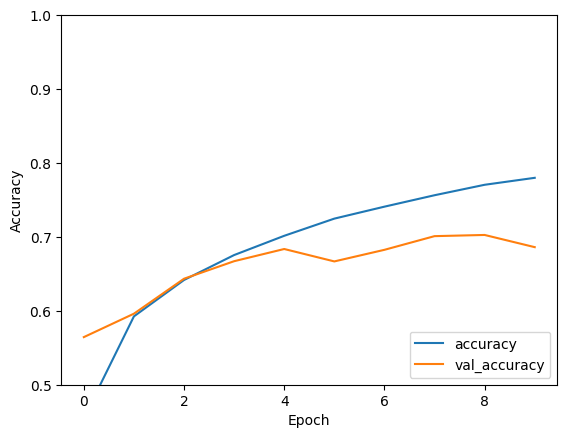

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)